# **Multi Linear Regression - Assignment**

data = 50_Startups.csv

## **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## **Import Data**

In [ ]:
dataset = pd.read_csv('50_Startups.csv')

##**Analyzing the data**

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## **Assumption Check**

#### **1. Check Linearity**

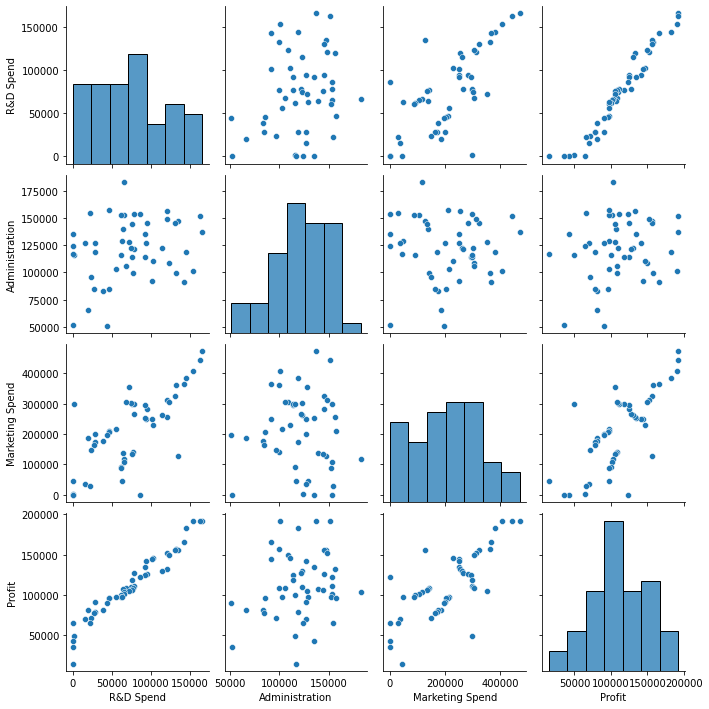

In [ ]:
sns.pairplot(dataset)
plt.show()

#### **Inference**:
* As we can see in the pairpot, the more you invest in Research and Development the greater will be your profit.
* The marketing spend seems to be directly proportional (though little bit outliers are there) with the profit.
* The administration spend seems to have no relation with the profit.


#### **2. No Multicollinearity**

In [ ]:
Corr_matrix = dataset.corr().round(2)
Corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


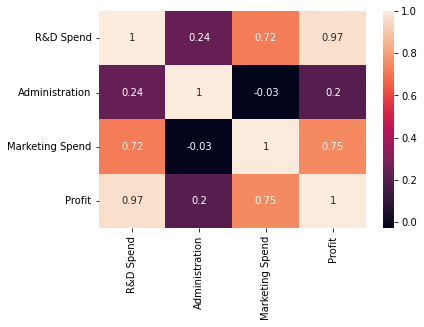

In [ ]:
sns.heatmap(data = Corr_matrix, annot=True)
plt.show()

**Inference :** The heatmap of correlation also demonstrates similar insights i.e. direct relationship with profit
Outliers detection in target variable


#### **3. Auto Regression** - It's satisfied

#### **4. Homoscedasticity** - It can be check during model building

#### **5. Zero Residual Mean** - It can also be check during model building

## **EDA on Dataset**

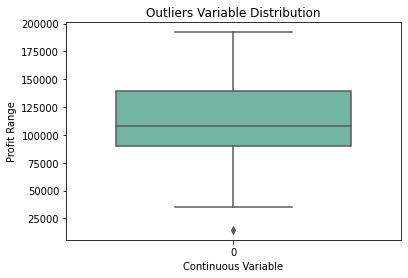

In [ ]:
sns.boxplot(data=dataset['Profit'], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot ,
 # orient = "h" : hotrizontal boxplot
plt.rcParams['figure.figsize'] = [8,8]
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()


**Inference :** While looking at the boxplot we can see the outliers in the profit(target variable) ,but the amount of data is not much (just 50
enteries) so it won't create much negative impact.


#### **State wise outliers detection**

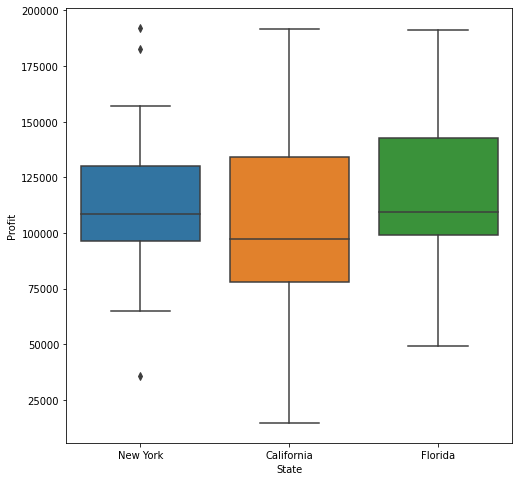

In [ ]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()


**Insights:**
* All outliers presented are in the state of New York.
* The startups located in the state of California have a greater range between the minimum and the maximum profit.


#### **Histgram on Profit**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

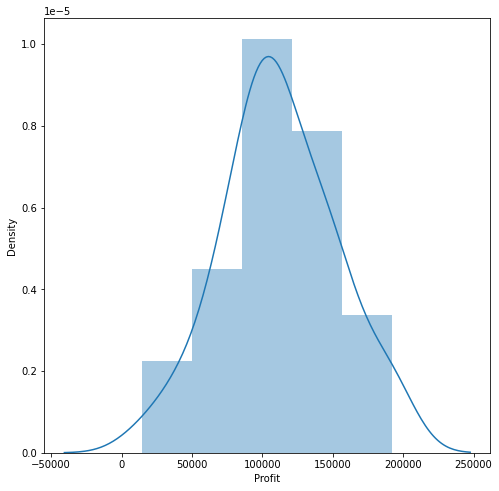

In [ ]:
sns.distplot(dataset['Profit'],bins=5,kde=True,hist = True)
plt.show()

**Inference :** The average profit (which is 100k) is the most frequent i.e. it's more likely to be in distribution plot.


## **Model Development**

In [ ]:
x= dataset[['R&D Spend','Administration','Marketing Spend']]
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [ ]:
y = dataset[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 12)
x_train

,R&D Spend,Administration,Marketing Spend
17,94657.16,145077.58,282574.31
38,20229.59,65947.93,185265.10
37,44069.95,51283.14,197029.42
15,114523.61,122616.84,261776.23
31,61136.38,152701.92,88218.23
14,119943.24,156547.42,256512.92
26,75328.87,144135.98,134050.07
9,123334.88,108679.17,304981.62
33,55493.95,103057.49,214634.81
47,0.00,135426.92,0.00


In [ ]:
x_test

,R&D Spend,Administration,Marketing Spend
28,66051.52,182645.56,118148.20
46,1315.46,115816.21,297114.46
7,130298.13,145530.06,323876.68
41,27892.92,84710.77,164470.71
36,28663.76,127056.21,201126.82
29,65605.48,153032.06,107138.38
21,78389.47,153773.43,299737.29
48,542.05,51743.15,0.00
19,86419.70,153514.11,0.00
8,120542.52,148718.95,311613.29


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[ 99227.78590106],
       [ 57330.42689013],
       [158942.01003194],
       [ 76443.25357295],
       [ 75488.25175017],
       [100412.02470383],
       [116367.18632661],
       [ 51779.85090037],
       [113711.10968112],
       [150603.23224831]])

In [ ]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)


Model Score/Performance on Testing data 0.9497398332848894
Model Score/Performance on Training data 0.9485205028772793


In [ ]:
error = y_pred - y_test
error

,Profit
28,-4054.594099
46,7839.676890
7,3189.410032
41,-1355.576427
36,-15219.938250
29,-592.615296
21,5054.166327
48,16106.440900
19,-9065.750319
8,-1608.537752


## **Model Evaluation**

R2 score: R2 score - R squared score. It is one of those statistical approach by which we can find the variance or the spread of the dependent
variables with the help of independent data.


In [ ]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 94.13517342091785


MSE: MSE - Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the points

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6916451623.450809


RMSE: RMSE - Root Mean Squared Error. This is the similar to Mean squared error(MSE) approach, the only difference is that here we find the root of
mean squared error i.e. root of Mean squared error is equals to Root Mean Squared Error. The reason behind finding the root is to find the more
close residual error as compared to the values found by mean squared error.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)


Root Mean Squarred Error is :  831652.068082008


MAE: MAE - Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that
difference is absolute i.e. the difference is positive.


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6408.67062916121


**Conclusion:**

So, the mean absolute error is **6408.67062916121**. Therefore our predicted value can be **6408.67062916121 units greater than or less than
the actual value.**